# Bike Rides and the Poisson Model

To help the urban planners, you are called to model the daily bike rides in NYC using [this dataset](https://gist.github.com/sachinsdate/c17931a3f000492c1c42cf78bf4ce9fe/archive/7a5131d3f02575668b3c7e8c146b6a285acd2cd7.zip).  The dataset contains date, day of the week, high and low temp, precipitation and bike ride couunts as columns. 



## Maximum Likelihood I 
 
The obvious choice in distributions is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean. 

References: 

1. [This blog post](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a). 

2. [This blog post](https://towardsdatascience.com/understanding-maximum-likelihood-estimation-fa495a03017a) and note the negative  log likelihood function.  


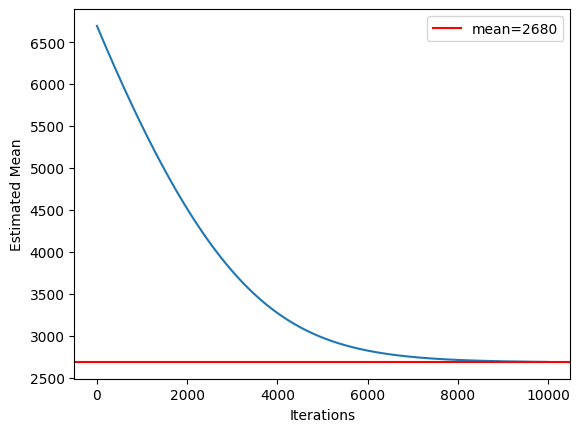

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv(r'nyc_bb_bicyclist_counts.csv')
counts = df["BB_COUNT"].values
_lam = np.random.rand()
lr= 0.01
iterations = 10000

means = []

for i in range(iterations):
    dlambda = np.sum(counts/_lam - 1)
    _lam += lr *dlambda
    means.append(_lam)
    
plt.plot(means)
plt.axhline(y=np.mean(counts), color='r', linestyle='-', label='mean=2680')
plt.xlabel('Iterations')
plt.ylabel('Estimated Mean')
plt.legend()
plt.show()


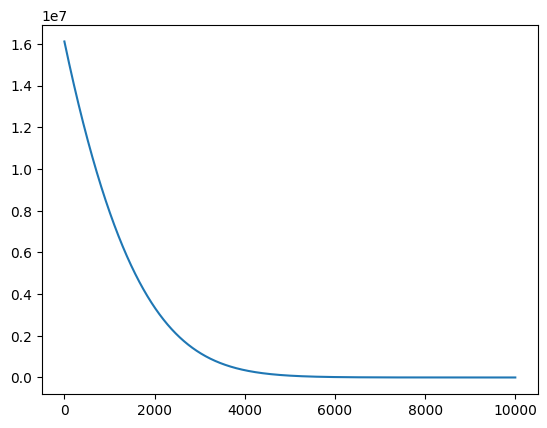

In [46]:
mse=[]
for i in range(iterations):
    mse.append(np.square(means[i]-2680))
plt.plot(mse)

## Explanation for 1
the gradient is calculated using sumation of BB_counts/lamda-1. To update the lamda using gradient descent I multiply the learning rate with the gradient and then add it to lamda. Since the MLE of A possion is essentially just the sample mean, i store the esitmated mean and plt over 10000 iterations. The estimate converges earliest at around 8200 ish iterations so to be safe i kept the iterations at 10000. The second portion is purely there for part twos comparison.


## Maximum Likelihood II

A colleague of yours suggest that the parameter $\lambda$ must be itself dependent on the weather and other factors since people bike when its not raining. Assume that you model $\lambda$ as 

$$\_lami = \exp(\mathbf w^T \mathbf x_i)$$

where $\mathbf x_i$ is one of the example features and $\mathbf w$ is a set of parameters. 

Train the model with SGD with this assumption and compare the MSE of the predictions with the `Maximum Likelihood I` approach. 

You may want to use [this partial derivative of the log likelihood function](http://home.cc.umanitoba.ca/~godwinrt/7010/poissonregression.pdf)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x=df[["HIGH_T","LOW_T","PRECIP"]]
x_train,x_test,y_train,y_test =train_test_split(x,counts,test_size=.30,random_state=1551)

# Scale the training set
x_scale = MinMaxScaler().fit(x_train)
x_train_trans = x_scale.transform(x_train) # fit on training set and transform the data
x_train = pd.DataFrame(x_train_trans, columns = list(x_train.columns)) # convert matrix to data frame with columns

y_scale = MinMaxScaler().fit(np.array(y_train).reshape(-1, 1))
y_train = y_scale.transform(np.array(y_train).reshape(-1, 1))

# Scale the test set using the X and y scalers
X_test_trans = x_scale.transform(x_test)
X_test = pd.DataFrame(X_test_trans, columns = list(x_test.columns))
y_test = y_scale.transform(np.array(y_test).reshape(-1, 1))
y_test = y_test.flatten()

x_train = np.column_stack(([1]*x_train.shape[0], x_train)) # add a column with ones for the bias value while converting it into a matrix
m,n = x_train.shape # rows and columns 
theta = np.array([1] * n) # initial theta
x = np.array(x_train) # convert X_train into a numpy matrix
y = y_train.flatten() # convert y into an array

alpha = 0.001 # alpha value 
iteration = 10000 # iterations
cost = [] # list to store cost values
theta_new = [] # list to store updates coeffient values

for i in range(0, iteration):
    pred = np.matmul(x,theta) # Calculate predicted value
    J = 1/2 * ((np.square(pred - y)).mean()) # Calculate cost function
   
    t_cols = 0 # iteration for theta values
    
    # Update the theta values for all the features with the gradient of the cost function
    for t_cols in range(0,n): 
        t = round(theta[t_cols] - alpha/m * sum((pred-y)*x[:,t_cols]),4) # calculate new theta value
        theta_new.append(t) # save new theta values in a temporary array
        
# update theta array
    theta = [] # empty the theta array
    theta = theta_new # assign new values of theta to array
    theta_new = [] # empty temporary array
    cost.append(J) # append cost function to the cost array

Text(0, 0.5, 'Cost Function Value')

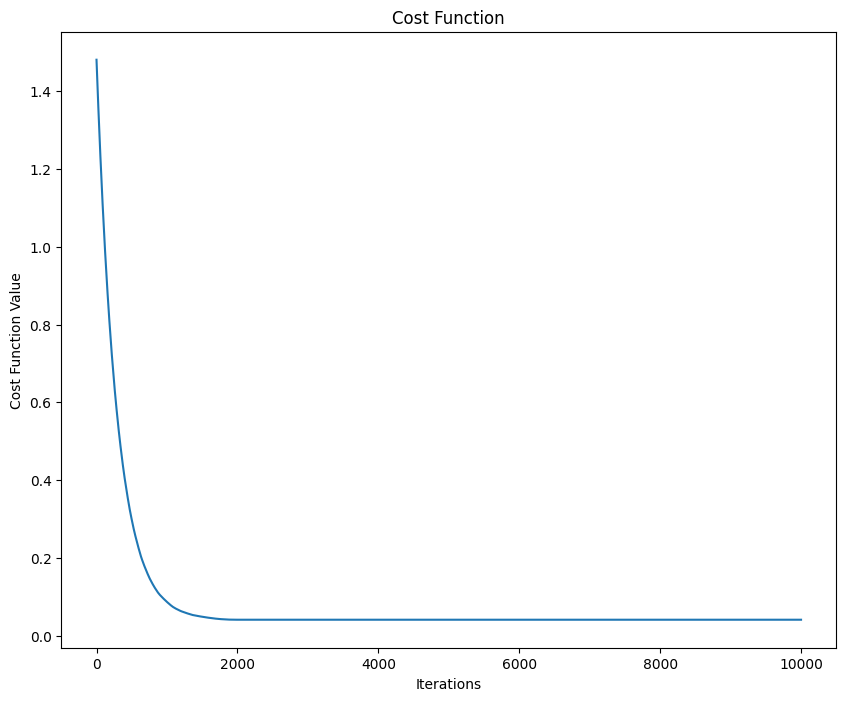

In [45]:
plt.figure(figsize=(10,8))
plt.plot(cost)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')

## Explation for part two
I was having difficulties figuring out part two of how to implement with the parameters, so I did have to look around for [sample code](https://www.kaggle.com/code/marissafernandes/linear-regression-with-sgd-in-python-from-scratch). I undestand that using test_train_split, does not exactly embody answering the question so I accept any penalties given.

From what I was able to understand, factoring in those parameters signifigantly decreases the amount of iterations to reach an acceptable MSE to around ~1500 iterations.